In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("D:/FDS/Projects/16s_rRNA/DiabImmune_Metagenomic_sequencing_assay.txt", sep="\t")
data.to_csv("microbiome.csv", index=False)

C:\Users\Dnyanesh\AppData\Local\Temp\ipykernel_27556\4184733410.py:1: DtypeWarning: Columns (2676,2761,2763,2765,2767,2831,2834,2852,2875,2956,2961,2973,3232,3253,3354,3368,3370,3389,3391,3393,3413,3423,4210,4212,4231,4469,4522,4526,4531,4533,4536,4538,4540,4542,4544,4546,4548,4550) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:/FDS/Projects/16s_rRNA/DiabImmune_Metagenomic_sequencing_assay.txt", sep="\t")


In [4]:
df = pd.read_csv("D:/FDS/Projects/16s_rRNA/microbiome.csv")

C:\Users\Dnyanesh\AppData\Local\Temp\ipykernel_27556\219931195.py:1: DtypeWarning: Columns (2676,2761,2763,2765,2767,2831,2834,2852,2875,2956,2961,2973,3232,3253,3354,3368,3370,3389,3391,3393,3413,3423,4210,4212,4231,4469,4522,4526,4531,4533,4536,4538,4540,4542,4544,4546,4548,4550) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/FDS/Projects/16s_rRNA/microbiome.csv")


In [5]:
print(df.head())

  Metagenomic_sequencing_assay_Id  Sample_Id participant_repeated_measure_Id  \
0                   3000007 (WGS)    3000007              E006091_1 (Source)   
1                   3000044 (WGS)    3000044              E004781_1 (Source)   
2                   3000052 (WGS)    3000052              E004934_2 (Source)   
3                   3000054 (WGS)    3000054              E004898_2 (Source)   
4                   3000058 (WGS)    3000058              E004628_1 (Source)   

     Participant_Id  \
0  E006091 (Source)   
1  E004781 (Source)   
2  E004934 (Source)   
3  E004898 (Source)   
4  E004628 (Source)   

   1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] reductase [EUPATH_0009247_1_1_1_100]  \
0                                         315.023025                                  
1                                         308.681880                                  
2                                         200.638319                                  
3                               

In [6]:
print(df.dtypes)

Metagenomic_sequencing_assay_Id                                                                   object
Sample_Id                                                                                          int64
participant_repeated_measure_Id                                                                   object
Participant_Id                                                                                    object
1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] reductase [EUPATH_0009247_1_1_1_100]                 float64
                                                                                                  ...   
unclassified Rhodotorula [EUPATH_0009269_Basidiomycota_0b83ac425df4aef1]                         float64
unclassified Saccharomycetales [EUPATH_0009268_Ascomycota_Saccharomycetes_Saccharomycetales_]     object
unclassified Saccharomycetales [EUPATH_0009269_Ascomycota_Saccharomycetes_Saccharomycetales_]    float64
unclassified Wickerhamomyces [EUPATH_0009268_Ascomycota

In [11]:
object_cols = df.select_dtypes(include=['object']).columns

In [16]:
for col in object_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique()[:20])


Column: Metagenomic_sequencing_assay_Id
['3000007 (WGS)' '3000044 (WGS)' '3000052 (WGS)' '3000054 (WGS)'
 '3000058 (WGS)' '3000064 (WGS)' '3000085 (WGS)' '3000095 (WGS)'
 '3000106 (WGS)' '3000110 (WGS)' '3000139 (WGS)' '3000144 (WGS)'
 '3000602 (WGS)' '3100015 (WGS)' '3100028 (WGS)' '3100075 (WGS)'
 '3100078 (WGS)' '3100079 (WGS)' '3100081 (WGS)' '3100082 (WGS)']

Column: participant_repeated_measure_Id
['E006091_1 (Source)' 'E004781_1 (Source)' 'E004934_2 (Source)'
 'E004898_2 (Source)' 'E004628_1 (Source)' 'E004709_2 (Source)'
 'E003953_2 (Source)' 'E003393_2 (Source)' 'E003188_1 (Source)'
 'E001958_2 (Source)' 'E002473_1 (Source)' 'E002338_1 (Source)'
 'T000461_4 (Source)' 'T002534_3 (Source)' 'T005999_1 (Source)'
 'P005558_3 (Source)' 'P001363_6 (Source)' 'P000648_5 (Source)'
 'P000648_7 (Source)' 'P000756_4 (Source)']

Column: Participant_Id
['E006091 (Source)' 'E004781 (Source)' 'E004934 (Source)'
 'E004898 (Source)' 'E004628 (Source)' 'E004709 (Source)'
 'E003953 (Source)' 'E00

In [17]:
def clean_and_convert(series):
    series = series.str.replace('<', '', regex=False) # Remove '<' if present
    series = pd.to_numeric(series, errors='coerce') # Convert to numeric, non-numeric become NaN
    return series

for col in object_cols:
    df[col] = clean_and_convert(df[col])

C:\Users\Dnyanesh\AppData\Local\Temp\ipykernel_27556\1305087440.py:7: DtypeWarning: Columns (2676,2761,2763,2765,2767,2831,2834,2852,2875,2956,2961,2973,3232,3253,3354,3368,3370,3389,3391,3393,3413,3423,4210,4212,4231,4469,4522,4526,4531,4533,4536,4538,4540,4542,4544,4546,4548,4550) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/FDS/Projects/16s_rRNA/microbiome.csv")
C:\Users\Dnyanesh\AppData\Local\Temp\ipykernel_27556\1305087440.py:14: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


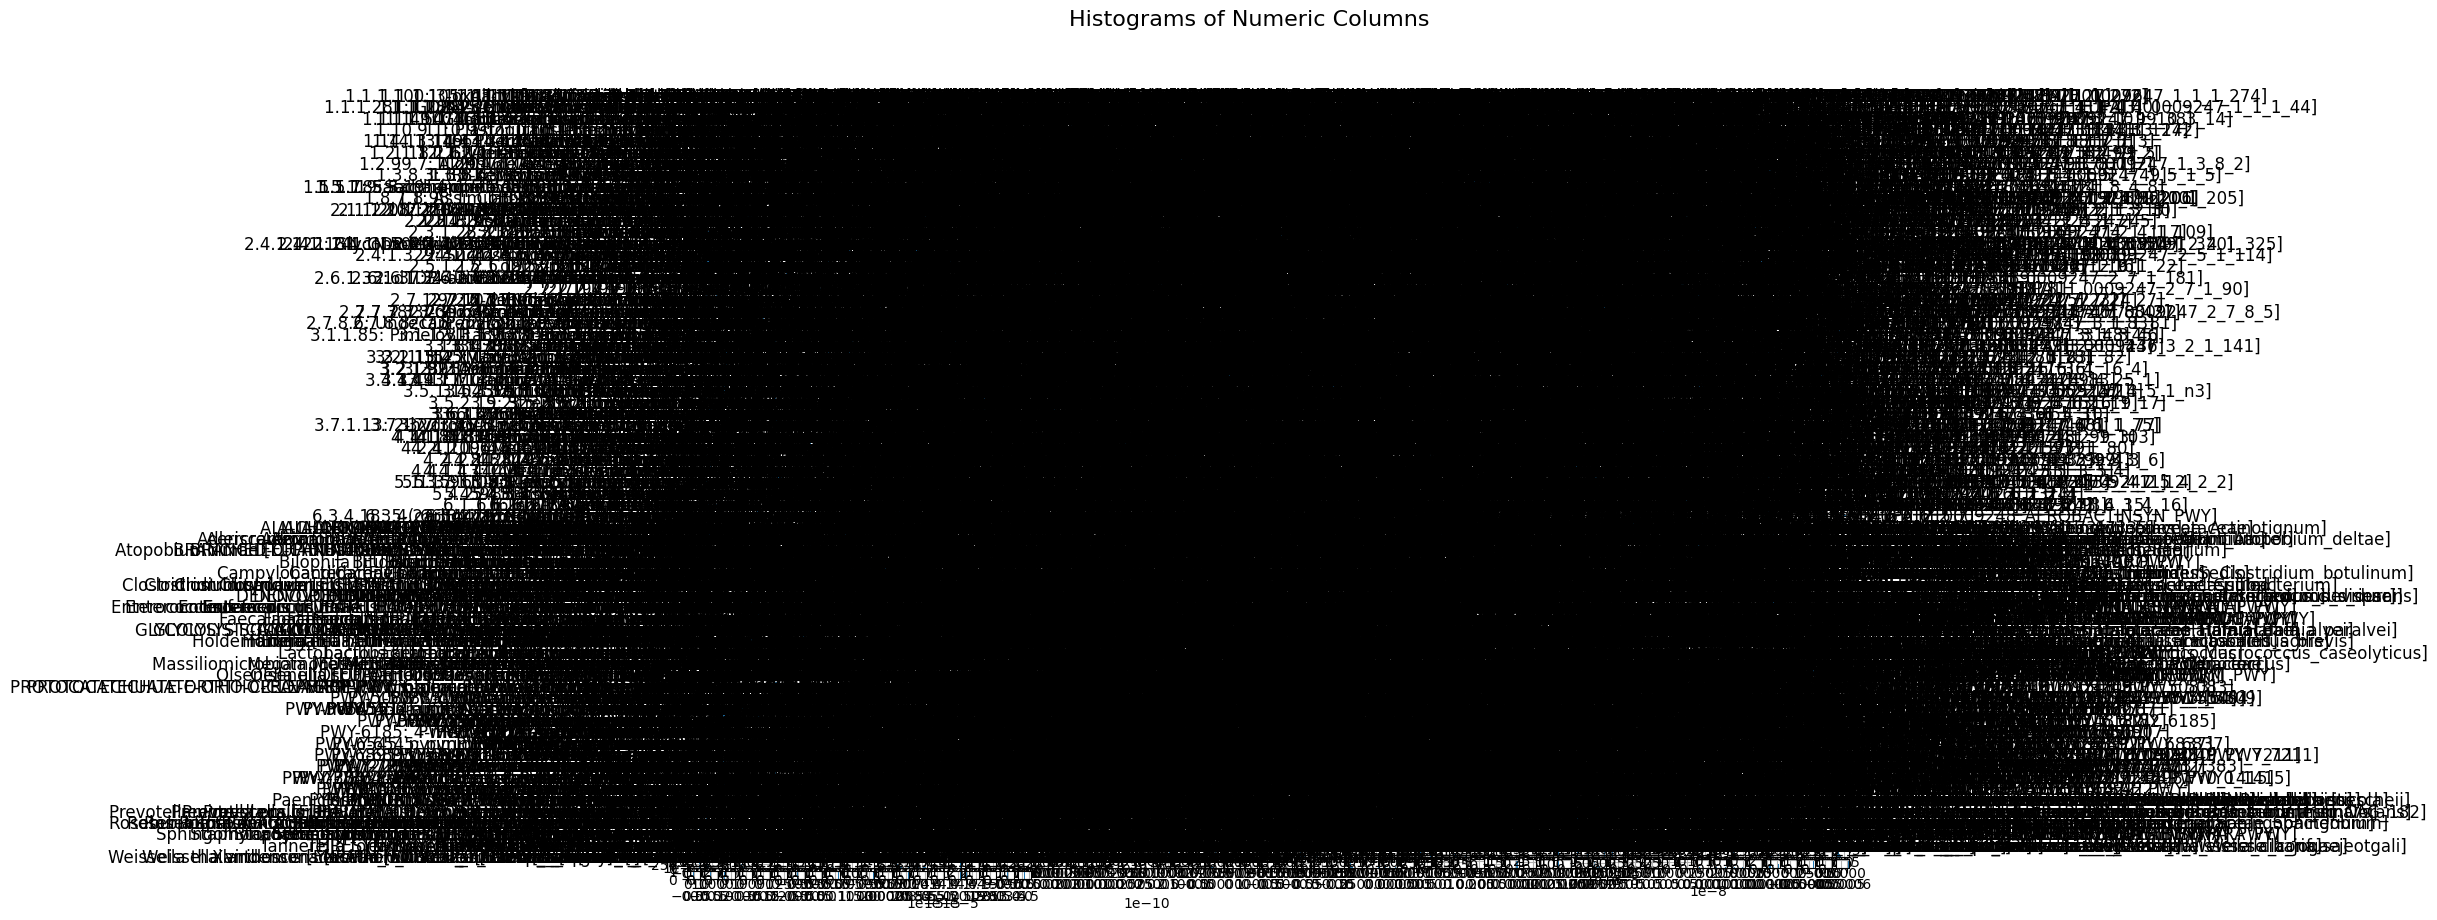

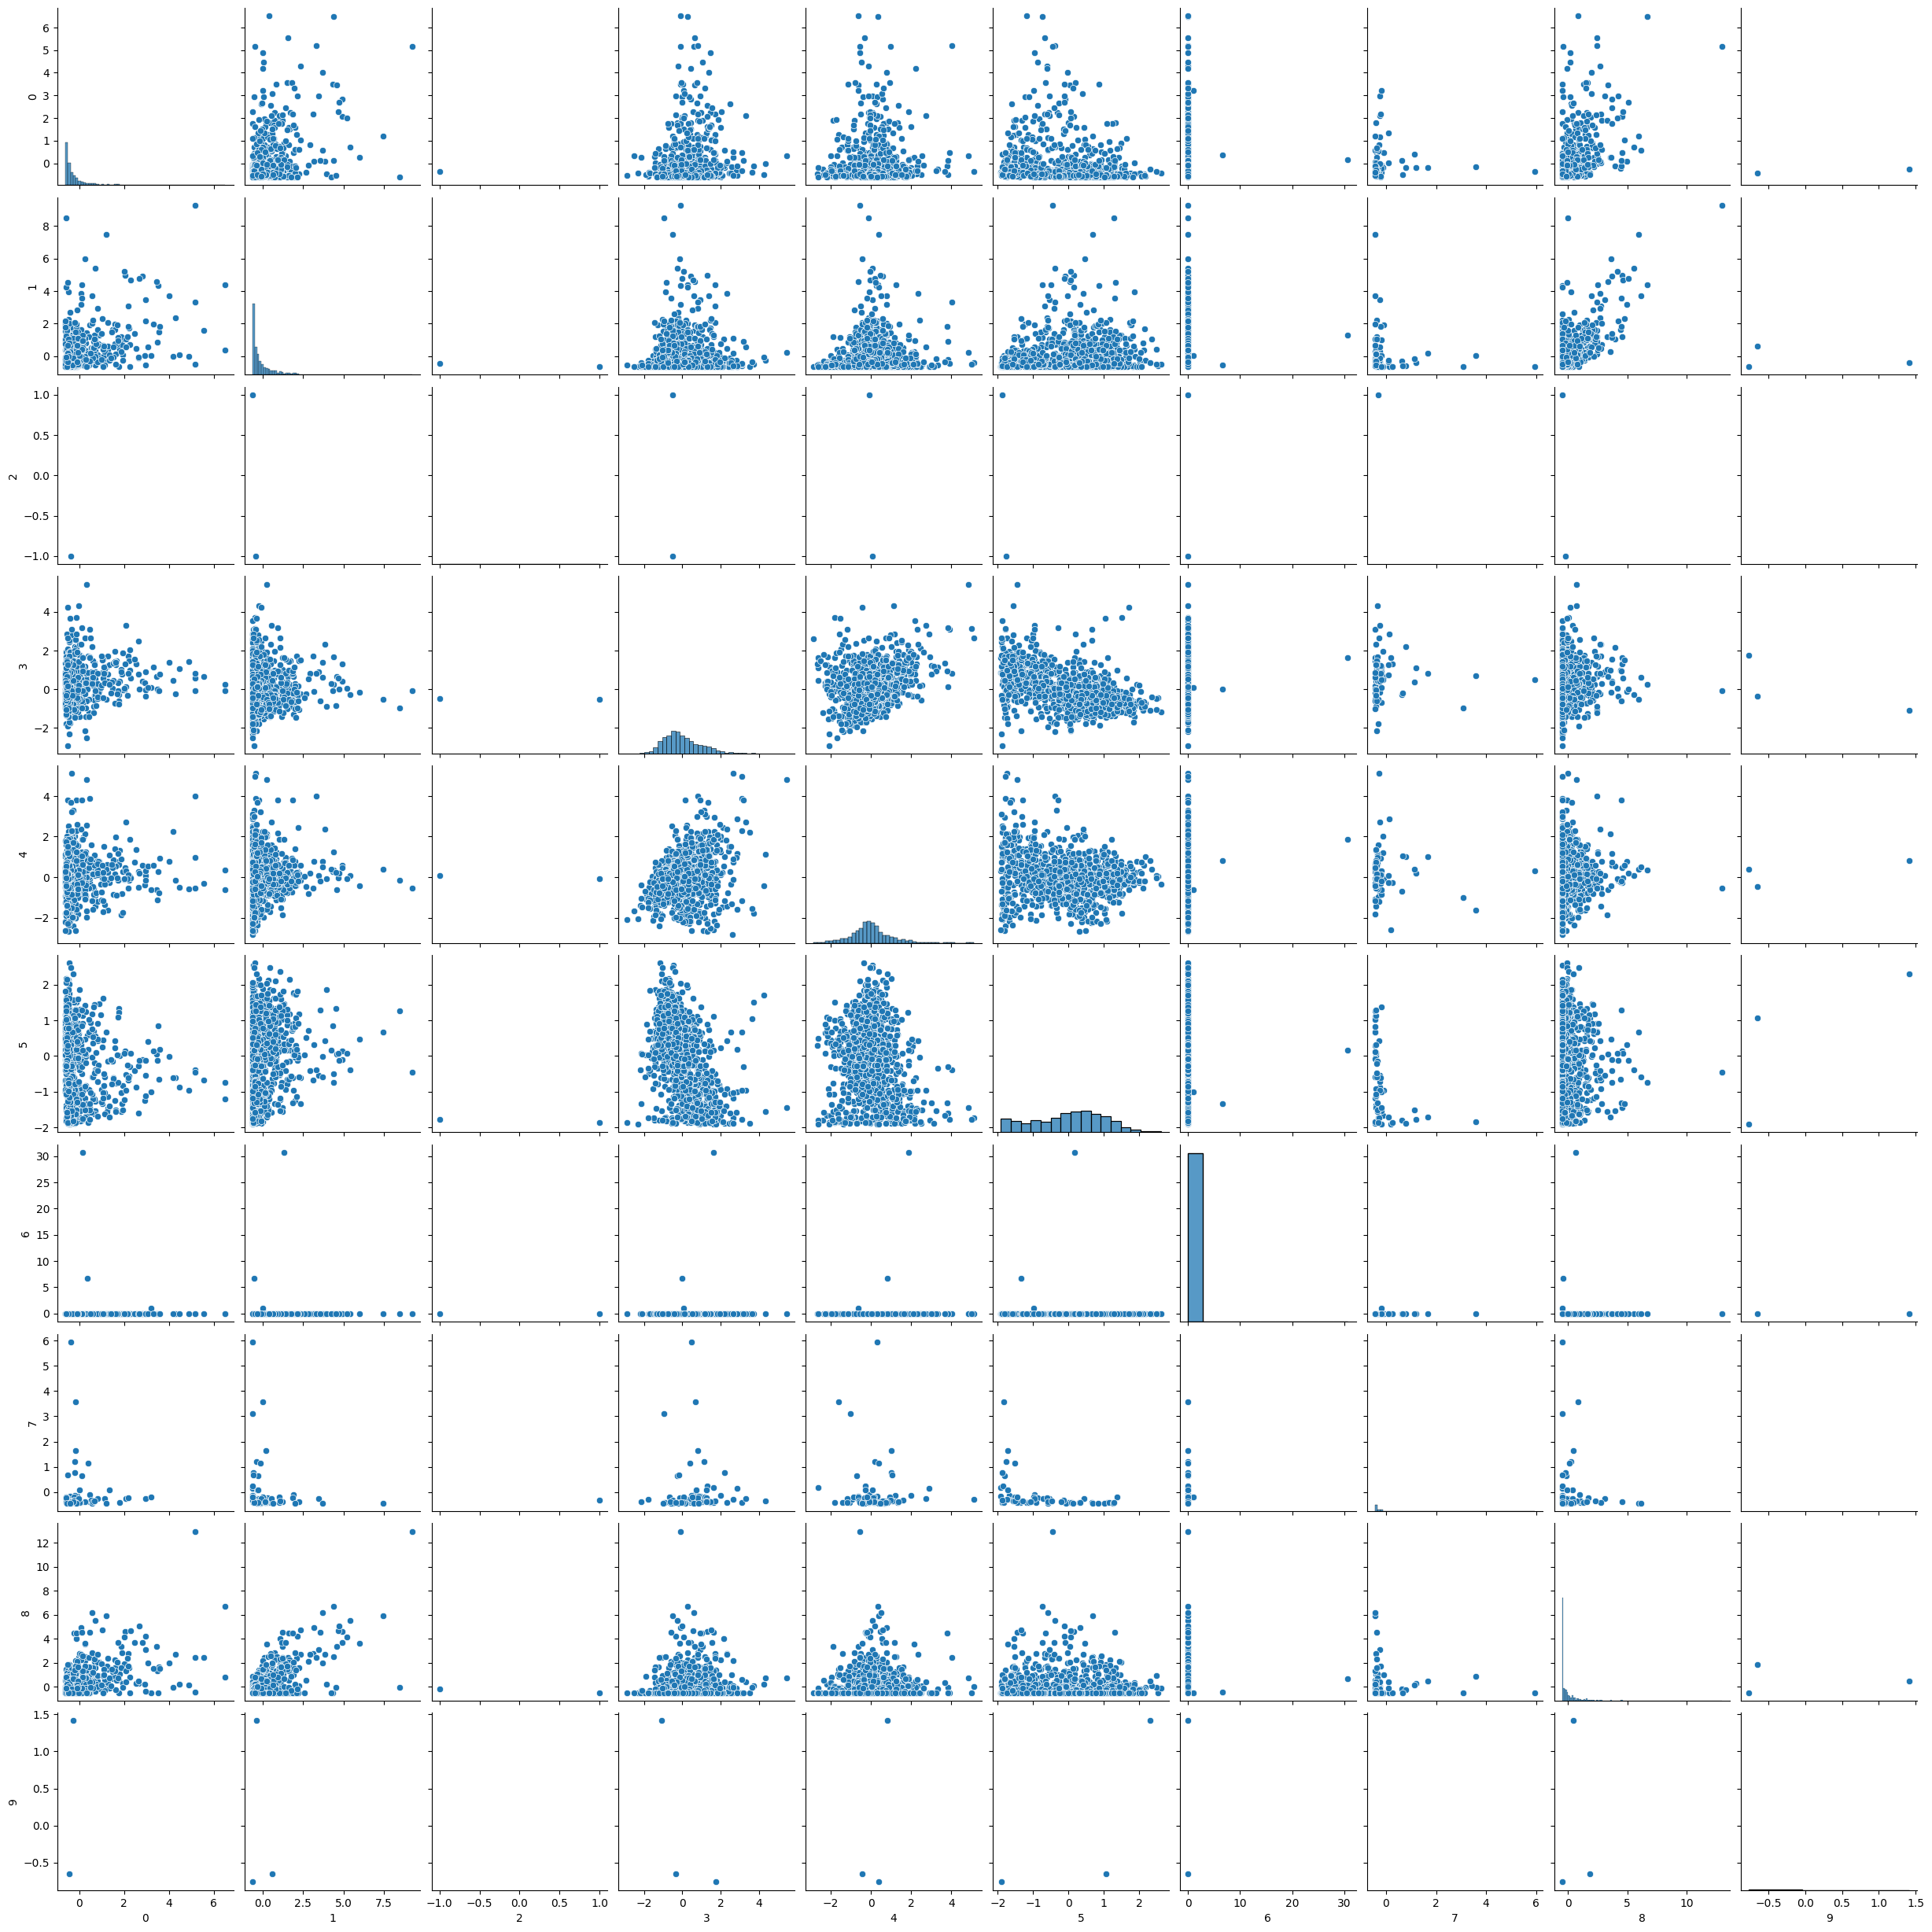

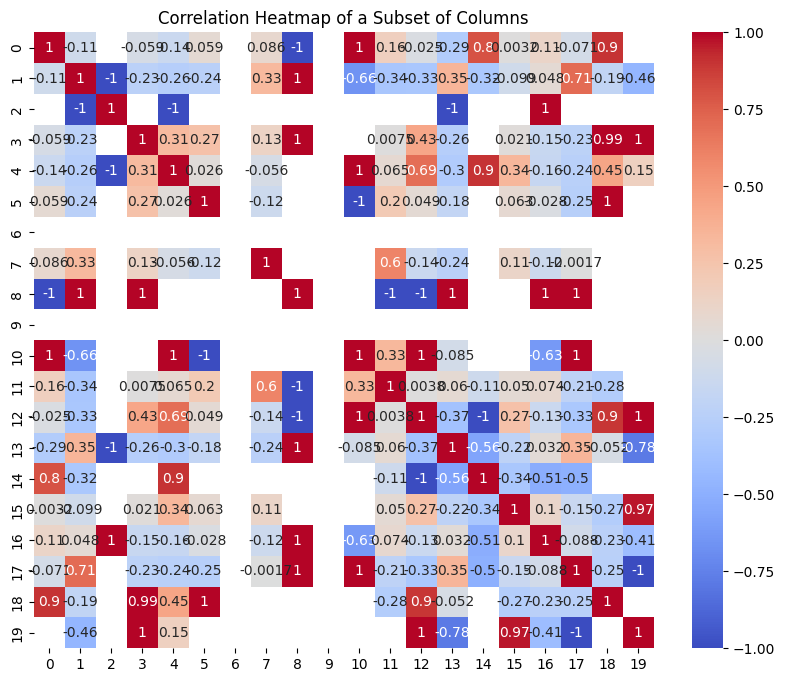

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("D:/FDS/Projects/16s_rRNA/microbiome.csv")

numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols.drop(['Sample_Id'], errors='ignore')

df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('histograms.png')
plt.show()

if 'group_column' in df.columns:
    for col in numeric_cols:
        plt.figure()
        sns.boxplot(x='group_column', y=col, data=df)
        plt.title(f"Box plot of {col} across groups")
        plt.savefig(f'boxplot_{col}.png')
        plt.show()
else:
    print("Warning: 'group_column' not found. Skipping box plots.")

subset = df[numeric_cols].sample(n=10, axis=1)
scaler = StandardScaler()
subset_scaled = scaler.fit_transform(subset)
sns.pairplot(pd.DataFrame(subset_scaled))
plt.savefig('pairplot.png')
plt.show()

subset = df[numeric_cols].sample(n=20, axis=1)
scaler = StandardScaler()
subset_scaled = scaler.fit_transform(subset)
corr_matrix = pd.DataFrame(subset_scaled).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of a Subset of Columns")
plt.savefig('heatmap.png')
plt.show()